In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('../experiments/test3_roberta3/pred-0.csv', sep='\t')

In [3]:
df.head()

,textID,text,selected_text,sentiment,c_selected_text,start_pos,end_pos,tokens,start,end,invert_map,first_token,in_st,senti_label,fold,pred,inst_pred
0,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,http://www.dothebouncy.com/smf - some shameles...,0,92,"['Ġhttp', '://', 'www', '.', 'd', 'othe', 'b',...",0,26,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[True, False, False, False, False, False, Fals...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1,0,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...
1,e050245fbd,both of you,both of you,neutral,both of you,0,11,"['Ġboth', 'Ġof', 'Ġyou']",0,2,"[0, 1, 2]","[True, True, True]","[1, 1, 1]",1,0,both of you,both of you
2,fc2cbefa9d,journey!? wow... u just became cooler. hehe......,wow... u just became cooler.,positive,wow... u just became cooler.,10,38,"['Ġjourney', '!?', 'Ġwow', '...', 'Ġu', 'Ġjust...",2,8,"[0, 0, 1, 1, 2, 3, 4, 5, 5, 6, 6, 6, 7, 7, 8, ...","[True, False, True, False, True, True, True, T...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...",2,0,wow... u just became cooler.,wow... cooler.
3,919fa93391,"i`ve been sick for the past few days and thus,...",sick,negative,sick,10,14,"['Ġi', '`', 've', 'Ġbeen', 'Ġsick', 'Ġfor', 'Ġ...",4,4,"[0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, 11...","[True, False, False, True, True, True, True, T...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,"sick for the past few days and thus, my hair l...",sick wierd.
4,d33f811375,i`m going home now. have you seen my new twitt...,quite....heavenly,positive,quite....heavenly,57,74,"['Ġi', '`', 'm', 'Ġgoing', 'Ġhome', 'Ġnow', '....",15,19,"[0, 0, 0, 1, 2, 3, 3, 4, 5, 6, 7, 8, 9, 10, 10...","[True, False, False, True, True, True, False, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,0,heavenly,quite....heavenly isn`****?


In [4]:
def jaccard_string(s1, s2):
    a = set(s1.lower().split())
    b = set(s2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [5]:
df['inst_pred'].fillna('', inplace=True)

In [6]:
df['jaccard'] = df.apply(lambda x: jaccard_string(x['selected_text'], x['pred']), axis=1)

In [7]:
df['jaccard'].mean()

0.7056043413439987

In [8]:
def aug_pred(pred, inst_pred):
    sp = pred.split()
    if len(str(inst_pred))==0:
        return pred
    if len(sp)<3:
        return pred+' '+inst_pred
    else:
        return pred

In [9]:
df['new_pred'] = df.apply(lambda x: aug_pred(x['pred'], x['inst_pred']), axis=1)

In [10]:
df['new_jaccard'] = df.apply(lambda x: jaccard_string(x['selected_text'], x['new_pred']), axis=1)

In [11]:
df['new_jaccard'].mean()

0.6951813194869767

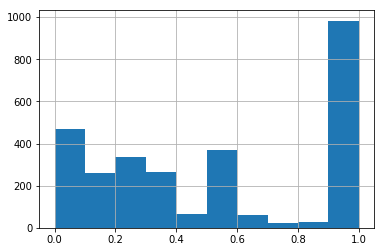

In [12]:
df[df['sentiment']!='neutral']['jaccard'].hist()

In [13]:
new_df=df[['text','selected_text','pred','inst_pred','new_pred','jaccard','new_jaccard']]

In [14]:
new_df.head()

,text,selected_text,pred,inst_pred,new_pred,jaccard,new_jaccard
0,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,1.000000,1.000000
1,both of you,both of you,both of you,both of you,both of you,1.000000,1.000000
2,journey!? wow... u just became cooler. hehe......,wow... u just became cooler.,wow... u just became cooler.,wow... cooler.,wow... u just became cooler.,1.000000,1.000000
3,"i`ve been sick for the past few days and thus,...",sick,"sick for the past few days and thus, my hair l...",sick wierd.,"sick for the past few days and thus, my hair l...",0.083333,0.083333
4,i`m going home now. have you seen my new twitt...,quite....heavenly,heavenly,quite....heavenly isn`****?,heavenly quite....heavenly isn`****?,0.000000,0.333333


In [15]:
new_df[new_df['new_jaccard']<new_df['jaccard']].sample(n=20)

,text,selected_text,pred,inst_pred,new_pred,jaccard,new_jaccard
1379,"ooooh, i`m jealous i might try and get some fo...",t i have an exam on the monday that im gonna fail,fail,i`m fail,fail i`m fail,0.083333,0.076923
2295,i hope they re-run this nerdprom later- sounds...,g lots of fun.,fun.,they`re fun.,fun. they`re fun.,0.250000,0.200000
3462,wishes people wouldn`t be so stubborn sometimes.,wishes,wishes,wishes wouldn`t sometimes.,wishes wishes wouldn`t sometimes.,1.000000,0.333333
4388,may the 4th be with you! happy star wars day!,happy,happy,happy day!,happy happy day!,1.000000,0.500000
149,is getting ready for bed. happy mother`s day t...,happy,happy,happy mother`s,happy happy mother`s,1.000000,0.500000
771,i`m so sleepy now...g`night! happy mother`s da...,happy,happy,happy mother`s,happy happy mother`s,1.000000,0.500000
116,great pics! you should try to start selling yo...,great,great,great pics!,great great pics!,1.000000,0.500000
1511,so afraid my daughter`s gonna write a memoir w...,so afraid,afraid,afraid ungodly,afraid afraid ungodly,0.500000,0.333333
1309,wish we had a garden so we could have a bbq to...,wish,wish,that`ll work.,wish that`ll work.,1.000000,0.333333
819,thanks bb.,thanks,thanks,thanks bb.,thanks thanks bb.,1.000000,0.500000


In [16]:
new_df[new_df['jaccard']<0.2].shape

(734, 7)

In [17]:
new_df[new_df['jaccard']<0.2].sample(n=20)

,text,selected_text,pred,inst_pred,new_pred,jaccard,new_jaccard
3753,ben and jerry...yummmmy!!!,.yummmmy!,yummmmy!!!,jerry...yummmmy!!!,yummmmy!!! jerry...yummmmy!!!,0.000000,0.000000
3189,tired with a headache me no like sunshine,headache,tired,tired,tired tired,0.000000,0.000000
1130,ahh i`m so confused what can i do? i don`t wan...,false hope!,confused,i`m confused,confused i`m confused,0.000000,0.000000
68,bouncing rush makes me feel nauseous,bouncing rush makes me feel nauseous,nauseous,nauseous,nauseous nauseous,0.166667,0.166667
3977,no. and she was suggesting it for loan deferment,s suggesting,suggesting it for loan deferment,deferment,suggesting it for loan deferment,0.166667,0.166667
2455,sry but other day tweets were mia - twitter ne...,sry but other day tweets were mia - twitter ne...,"glitch,","glitch, mix-up,","glitch, glitch, mix-up,",0.043478,0.086957
1269,wow! i`ve joined the photography scene pretty ...,wow!,wow! i`ve joined the photography scene pretty ...,wow! interesting,wow! i`ve joined the photography scene pretty ...,0.058824,0.058824
1258,nice recolouring of your page nobody is buying...,u love,nice recolouring of your page nobody is buying...,love it!!!!,nice recolouring of your page nobody is buying...,0.071429,0.071429
733,don`t know what to do right now...pretty bored...,"pretty bored, but i refuse to study.","bored,","bored,","bored, bored,",0.142857,0.142857
4740,did you decide it is a sprain? mine has been b...,"mine has been bothering me again,",bothering,"bothering again,","bothering bothering again,",0.166667,0.333333


## label length

In [18]:
not_neutral = df[df['sentiment']!='neutral']

In [19]:
not_neutral.shape

(2861, 20)

In [20]:
not_neutral.head()

,textID,text,selected_text,sentiment,c_selected_text,start_pos,end_pos,tokens,start,end,invert_map,first_token,in_st,senti_label,fold,pred,inst_pred,jaccard,new_pred,new_jaccard
2,fc2cbefa9d,journey!? wow... u just became cooler. hehe......,wow... u just became cooler.,positive,wow... u just became cooler.,10,38,"['Ġjourney', '!?', 'Ġwow', '...', 'Ġu', 'Ġjust...",2,8,"[0, 0, 1, 1, 2, 3, 4, 5, 5, 6, 6, 6, 7, 7, 8, ...","[True, False, True, False, True, True, True, T...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...",2,0,wow... u just became cooler.,wow... cooler.,1.000000,wow... u just became cooler.,1.000000
3,919fa93391,"i`ve been sick for the past few days and thus,...",sick,negative,sick,10,14,"['Ġi', '`', 've', 'Ġbeen', 'Ġsick', 'Ġfor', 'Ġ...",4,4,"[0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, 11...","[True, False, False, True, True, True, True, T...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,"sick for the past few days and thus, my hair l...",sick wierd.,0.083333,"sick for the past few days and thus, my hair l...",0.083333
4,d33f811375,i`m going home now. have you seen my new twitt...,quite....heavenly,positive,quite....heavenly,57,74,"['Ġi', '`', 'm', 'Ġgoing', 'Ġhome', 'Ġnow', '....",15,19,"[0, 0, 0, 1, 2, 3, 3, 4, 5, 6, 7, 8, 9, 10, 10...","[True, False, False, True, True, True, False, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,0,heavenly,quite....heavenly isn`****?,0.000000,heavenly quite....heavenly isn`****?,0.333333
6,b159318d76,bah a coworker ran into work late and her bag ...,hurts,negative,hurts,77,82,"['Ġb', 'ah', 'Ġa', 'Ġcowork', 'er', 'Ġran', 'Ġ...",19,19,"[0, 0, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 1...","[True, False, True, True, False, True, True, T...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,hurts now,hurts,0.500000,hurts now hurts,0.500000
7,98f25bc596,mannnn..... _ got an iphone!!! im jealous.... ...,jealous..,negative,jealous..,34,43,"['Ġman', 'nn', 'n', '.....', 'Ġ_', 'Ġgot', 'Ġa...",12,13,"[0, 0, 0, 0, 1, 2, 3, 4, 4, 4, 4, 5, 6, 6, 7, ...","[True, False, False, False, True, True, True, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0,0,im jealous....,jealous....,0.000000,im jealous.... jealous....,0.000000


In [21]:
not_neutral['st_word_len'] = not_neutral['selected_text'].apply(lambda x: len(x.split()))

/home/yuanhao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
not_neutral['text_word_len'] = not_neutral['text'].apply(lambda x: len(x.split()))

/home/yuanhao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
not_neutral['len_ratio'] = not_neutral.apply(lambda x: x['st_word_len']/x['text_word_len'], axis=1)

/home/yuanhao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


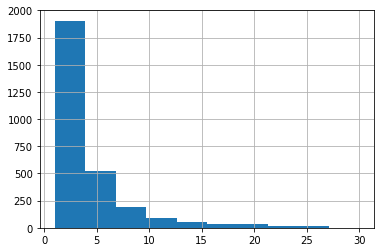

In [22]:
not_neutral['st_word_len'].hist()

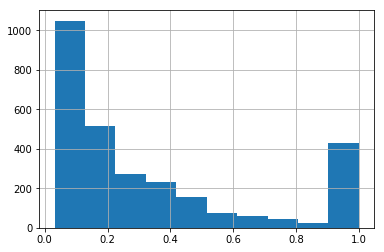

In [26]:
not_neutral['len_ratio'].hist()

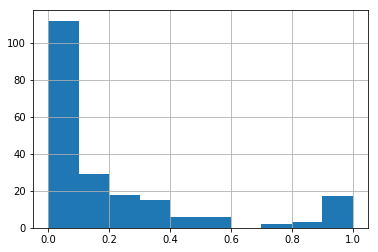

In [32]:
not_neutral[not_neutral['st_word_len']>10]['jaccard'].hist()

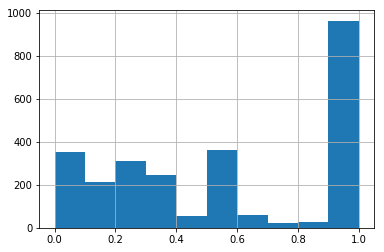

In [37]:
not_neutral[not_neutral['st_word_len']<10]['jaccard'].hist()

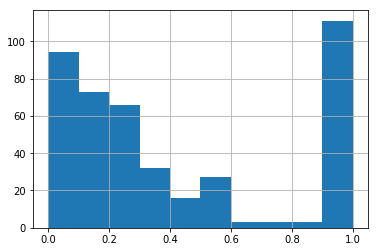

In [35]:
not_neutral[(not_neutral['len_ratio']>0.9)]['jaccard'].hist()

In [36]:
not_neutral[(not_neutral['len_ratio']>0.9)&(not_neutral['jaccard']<0.2)].head()

,textID,text,selected_text,sentiment,c_selected_text,start_pos,end_pos,tokens,start,end,...,senti_label,fold,pred,inst_pred,jaccard,new_pred,new_jaccard,st_word_len,text_word_len,len_ratio
68,95b9338e05,bouncing rush makes me feel nauseous,bouncing rush makes me feel nauseous,negative,bouncing rush makes me feel nauseous,0,36,"['Ġbouncing', 'Ġrush', 'Ġmakes', 'Ġme', 'Ġfeel...",0,6,...,0,0,nauseous,nauseous,0.166667,nauseous nauseous,0.166667,6,6,1.000000
84,d681f0dfbc,haha thanks its for history and its on how the...,haha thanks its for history and its on how the...,positive,haha thanks its for history and its on how the...,0,96,"['Ġhaha', 'Ġthanks', 'Ġits', 'Ġfor', 'Ġhistory...",0,17,...,2,0,thanks,thanks,0.062500,thanks thanks,0.062500,17,17,1.000000
121,152bedb5a6,"happy mother`s day to my mom, and every mom ev...","happy mother`s day to my mom, and every mom ev...",positive,"happy mother`s day to my mom, and every mom ev...",0,107,"['Ġhappy', 'Ġmother', '`', 's', 'Ġday', 'Ġto',...",0,25,...,2,0,happy,happy mother`s,0.055556,happy happy mother`s,0.111111,18,18,1.000000
138,d153e50085,"__buckley good for you mate, sadly i couldnt g...","good for you mate, sadly i couldnt get pissed ...",positive,"good for you mate, sadly i couldnt get pissed ...",10,86,"['Ġ__', 'buck', 'ley', 'Ġgood', 'Ġfor', 'Ġyou'...",3,18,...,2,0,good,good,0.071429,good good,0.071429,14,15,0.933333
151,6c2ac7dbcb,congradts on ur show even tho i wasnt there lol,congradts on ur show even tho i wasnt there lol,positive,congradts on ur show even tho i wasnt there lol,0,47,"['Ġcon', 'grad', 'ts', 'Ġon', 'Ġur', 'Ġshow', ...",0,12,...,2,0,congradts,congradts,0.100000,congradts congradts,0.100000,10,10,1.000000


In [34]:
not_neutral[(not_neutral['st_word_len']>10)&(not_neutral['jaccard']<0.2)].head()

,textID,text,selected_text,sentiment,c_selected_text,start_pos,end_pos,tokens,start,end,...,senti_label,fold,pred,inst_pred,jaccard,new_pred,new_jaccard,st_word_len,text_word_len,len_ratio
84,d681f0dfbc,haha thanks its for history and its on how the...,haha thanks its for history and its on how the...,positive,haha thanks its for history and its on how the...,0,96,"['Ġhaha', 'Ġthanks', 'Ġits', 'Ġfor', 'Ġhistory...",0,17,...,2,0,thanks,thanks,0.062500,thanks thanks,0.062500,17,17,1.000000
87,443d30a0ba,_rc234 haha yup. but still have a terrible hea...,terrible headache and super swollen and puffy ...,negative,terrible headache and super swollen and puffy ...,34,122,"['Ġ_', 'rc', '234', 'Ġhaha', 'Ġy', 'up', '.', ...",11,30,...,0,0,terrible,terrible,0.071429,terrible terrible,0.071429,15,22,0.681818
121,152bedb5a6,"happy mother`s day to my mom, and every mom ev...","happy mother`s day to my mom, and every mom ev...",positive,"happy mother`s day to my mom, and every mom ev...",0,107,"['Ġhappy', 'Ġmother', '`', 's', 'Ġday', 'Ġto',...",0,25,...,2,0,happy,happy mother`s,0.055556,happy happy mother`s,0.111111,18,18,1.000000
138,d153e50085,"__buckley good for you mate, sadly i couldnt g...","good for you mate, sadly i couldnt get pissed ...",positive,"good for you mate, sadly i couldnt get pissed ...",10,86,"['Ġ__', 'buck', 'ley', 'Ġgood', 'Ġfor', 'Ġyou'...",3,18,...,2,0,good,good,0.071429,good good,0.071429,14,15,0.933333
192,2889cb3b49,o can`t work that one out pain in the **** the...,o can`t work that one out pain in the **** the...,negative,can`t work that one out pain in the **** them ...,2,56,"['Ġo', 'Ġcan', '`', 't', 'Ġwork', 'Ġthat', 'Ġo...",1,14,...,0,0,pain,pain,0.083333,pain pain,0.083333,12,12,1.000000
